# *Implement the Model*

In [1]:
import torch
import torch.nn as nn

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

__init__() : <b>객체가 갖는 속성값을 초기화하는 역할</b>로 객채가 생성될 때 자동으로 호출<br>
<b>super()</b> : super() 함수를 부르면 nn.Module 클래스의 속성을 가지고 초기화<br>
<b>forward()</b> : 모델이 학습데이터를 입력받아서 forward 연산을 진행<br>

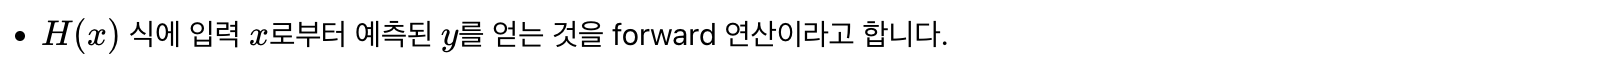

In [4]:
model = LinearRegressionModel()

# 

# *단순 선형 회귀 클래스*

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
torch.manual_seed(1)

In [8]:
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[2], [4], [6]])

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [10]:
model = LinearRegressionModel()

In [11]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [13]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    # H(x) 계산
    pred = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(pred, y_train)
    
    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


# 

# *다중 선형 회귀 클래스*

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
torch.manual_seed(1)

In [16]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [17]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [18]:
model = MultivariateLinearRegressionModel()

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [20]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225988
Epoch  200/2000 Cost: 0.223910
Epoch  300/2000 Cost: 0.221930
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218270
Epoch  600/2000 Cost: 0.216571
Epoch  700/2000 Cost: 0.214955
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211949
Epoch 1000/2000 Cost: 0.210558
Epoch 1100/2000 Cost: 0.209237
Epoch 1200/2000 Cost: 0.207971
Epoch 1300/2000 Cost: 0.206764
Epoch 1400/2000 Cost: 0.205616
Epoch 1500/2000 Cost: 0.204527
Epoch 1600/2000 Cost: 0.203479
Epoch 1700/2000 Cost: 0.202487
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200638
Epoch 2000/2000 Cost: 0.199769
